In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sys
try:
    sys.path.insert(0, '/Users/sasha')
    from myrcparams import *
except ModuleNotFoundError:
    sys.path.insert(0, '/Users/sashasafonova')
    from myrcparams import *
    

# Exercise 1

In [2]:
table_1 = np.array([[1, 201, 592, 61, 9, -0.84],
                    [2, 244, 401, 25, 4, 0.31],
                    [3, 47, 583, 38, 11, 0.64],
                    [4, 287, 402, 15, 7, -0.27],
                    [5, 203, 495, 21, 5, -0.33],
                    [6, 58, 173, 15, 9, 0.67],
                    [7, 210, 479, 27, 4, -0.02],
                    [8, 202, 504, 14, 4, -0.05],
                    [9, 198, 510, 30, 11, -0.84],
                    [10, 158, 416, 16, 7, -0.69],
                    [11, 165, 393, 14, 5, 0.30],
                    [12, 201, 442, 25, 5, -0.46],
                    [13, 157, 317, 52, 5, -0.03],
                    [14, 131, 311, 16, 6, 0.50],
                    [15, 166, 400, 34, 6, 0.73],
                    [16, 160, 337, 31, 5, -0.52],
                    [17, 186, 423, 42, 9, 0.90],
                    [18, 125, 334, 26, 8, 0.40],
                    [19, 218, 533, 16, 6, -0.78],
                    [20, 146, 344, 22, 5, -0.56]])
    
data = np.zeros(len(table_1), dtype={'names':('ID', 'x', 'y','sigma_y', 'sigma_x', 'rho_xy'),
                          'formats':('i4', 'f8', 'f8', 'f8', 'f8', 'f8')})

In [3]:
data['ID'] = table_1[:,0]
data['x'] = table_1[:,1]
data['y'] = table_1[:,2]
data['sigma_y'] = table_1[:,3]
data['sigma_x'] = table_1[:,4]
data['rho_xy'] = table_1[:,5]

In [ ]:
Y_mx = data['y'][...][4:20]
A_mx = np.array([np.ones_like(Y_mx), data['x'][...][4:20]]).T
C_mx = np.identity(len(data['sigma_y'][4:])) * data['sigma_y'][4:]

In [13]:
covariance_mx =  np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), A_mx])
ACY = np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), Y_mx])

X_mx = covariance_mx.dot(ACY)
slope_b, intercept_m = X_mx
# Uncertainties
slope_b_err = np.sqrt(covariance_mx)[0,0]
intercept_m_err = np.sqrt(covariance_mx)[1,1]

array([33.45048483,  2.221363  ])

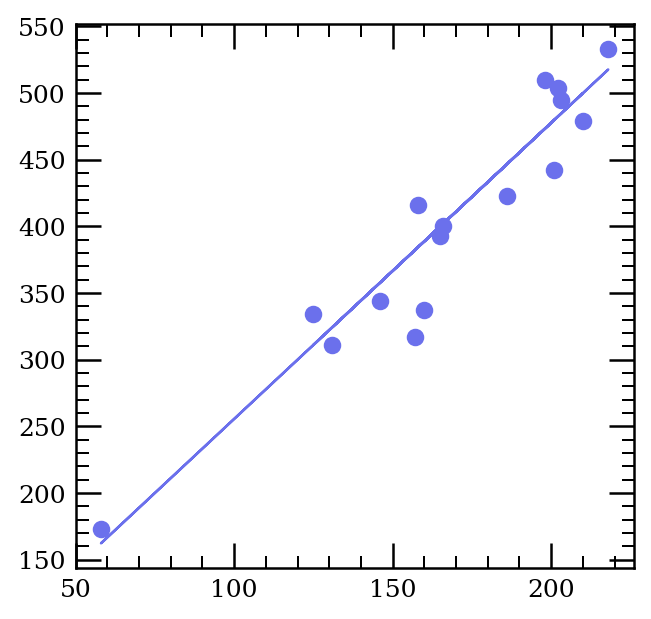

In [16]:
fig, axes = plt.subplots(figsize=(4,4), dpi=180)
axes.scatter(data['x'][4:], data['y'][4:])
axes.plot(data['x'][4:], X_mx[0] + data['x'][4:]*X_mx[1])

# Exercise 2

In [17]:
Y_mx = data['y'][...]
A_mx = np.array([np.ones_like(Y_mx), data['x'][...]]).T
C_mx = np.identity(len(data['sigma_y'])) * data['sigma_y']

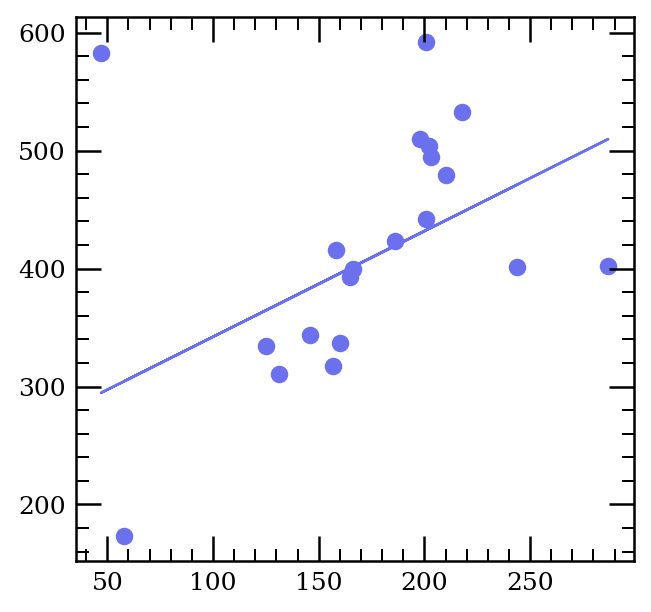

In [20]:
A_mx_T = A_mx.T
C_mx_inv = np.linalg.inv(C_mx)
first_mx =  A_mx_T.dot(C_mx_inv)
ACA = np.linalg.inv(first_mx.dot(A_mx))

ACY = first_mx.dot(Y_mx)
X_mx = ACA.dot(ACY)

fig, axes = plt.subplots(figsize=(4,4), dpi=180)
axes.scatter(data['x'], data['y'])
axes.plot(data['x'], X_mx[0] + data['x']*X_mx[1])

In [25]:
ACA

array([[ 1.14024045e+01, -5.87818140e-02],
       [-5.87818140e-02,  3.36033754e-04]])